# Hyperparameter Dependence

*Code to create Figure 3b in [Saliency Cards: A Framework to Characterize and Compare
Saliency Methods](https://arxiv.org/abs/2206.02958).*

Hyperparameter dependence measures a saliency method's sensitivity to user-specified parameters and design decisions. 

To illustrate hyperparameter dependence, we show how using different `baseline` values for [integrated gradients](https://arxiv.org/abs/1703.01365) can result in drastically different saliency maps.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch

from saliency_methods.integrated_gradients import IntegratedGradients
from saliency_methods.util import visualize_saliency
from util import imagenet_transform, imagenet_normalize, load_model_from_pytorch, load_pil_image

## Load ImageNet Image and ResNet50 Model
In this example we compute the saliency of a resnet50 model pretrained on ImageNet.

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model_from_pytorch('resnet50', True, device).eval()

We select an image from ImageNet to evaluate.

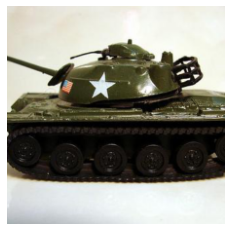

In [4]:
image_path = './resources/imagenet_tank.jpeg'
image = load_pil_image(image_path)

model_transform = imagenet_transform(normalize=True)
display_transform = imagenet_transform(normalize=False)

image_input = model_transform(image)
plt.imshow(display_transform(image).numpy().transpose(1, 2, 0))
plt.axis('off');

## Compute Integrated Gradients with Different Baselines
[Integrated gradients](https://arxiv.org/abs/1703.01365) is a saliency method that computes feature importance by integrating from a meaningless `baseline` image to the actual image. The results are highly sensitive to the `baseline` parameter ([more here](https://distill.pub/2020/attribution-baselines/)). We explore three baselines: the all black image, the all white image, and random noise.

In [5]:
image_batch = image_input.unsqueeze(0).to(device)

In [6]:
ig = IntegratedGradients(model)

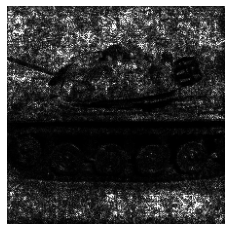

In [8]:
black_baseline = imagenet_normalize()(torch.zeros(image_batch.shape[1:])).unsqueeze(0)
ig_saliency_black = ig.get_saliency(image_batch, baseline=black_baseline)
visualize_saliency(ig_saliency_black, scheme='grayscale');

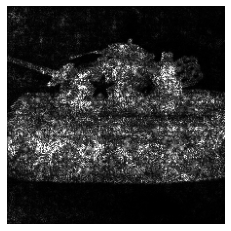

In [9]:
white_baseline = imagenet_normalize()(torch.ones(image_batch.shape[1:])).unsqueeze(0)
ig_saliency_white = ig.get_saliency(image_batch, baseline=white_baseline)
visualize_saliency(ig_saliency_white, scheme='grayscale');

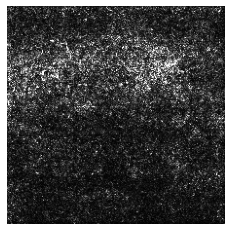

In [11]:
random_baseline = imagenet_normalize()(torch.randn(image_batch.shape[1:])).unsqueeze(0)
ig_saliency_random = ig.get_saliency(image_batch, baseline=random_baseline)
visualize_saliency(ig_saliency_random, scheme='grayscale');